In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *

In [4]:
np.random.seed(1234)
os.environ['PYTHONHASHSEED'] = str(1234)
random.seed(1234)
torch.backends.cudnn.deterministic = True
torch.manual_seed(1234)

In [5]:
path = Path("/home/kkalyan/agri-split/")

In [6]:
(path/"audio_files").ls()

(#2126) [Path('/home/kkalyan/agri-split/audio_files/BK8UDCM.wav'),Path('/home/kkalyan/agri-split/audio_files/3B5A2P3.wav'),Path('/home/kkalyan/agri-split/audio_files/7QXN2WO.wav'),Path('/home/kkalyan/agri-split/audio_files/E04FSN7.wav'),Path('/home/kkalyan/agri-split/audio_files/O0L4PC1.wav'),Path('/home/kkalyan/agri-split/audio_files/0TYHMIF.wav'),Path('/home/kkalyan/agri-split/audio_files/48PTKS5.wav'),Path('/home/kkalyan/agri-split/audio_files/J28NE2C.wav'),Path('/home/kkalyan/agri-split/audio_files/3J8WKXR.wav'),Path('/home/kkalyan/agri-split/audio_files/67FIJLB.wav')...]

In [7]:
df = pd.read_csv(path/"Train.csv")
df.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [8]:
from fastaudio.augment.spectrogram import CropTime

In [9]:
ct = CropTime(duration=1000)
cfg = AudioConfig.BasicMelSpectrogram(n_fft=512)
a2s = AudioToSpec.from_cfg(cfg)

In [10]:
auds = DataBlock(blocks=(AudioBlock, CategoryBlock),  
                 get_x=ColReader("fn", pref=path), 
                 batch_tfms = [a2s],
                 item_tfms=[ResizeSignal(3000), SignalShifter(), AddNoise()],
                 get_y=ColReader("label"))

In [11]:
dbunch = auds.dataloaders(df, bs=64)

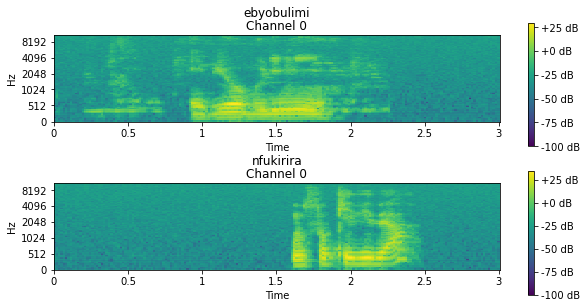

In [12]:
dbunch.show_batch(figsize=(10, 5))

In [13]:
dbunch.c

193

In [14]:
learn = cnn_learner(dbunch, 
            resnet18, 
            config=cnn_config(n_in=1),
            loss_fn=CrossEntropyLossFlat,
            metrics=[accuracy]).to_fp16()

In [15]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,7.096219,5.850502,0.009050,00:02


epoch,train_loss,valid_loss,accuracy,time
0,6.694786,5.717533,0.004525,00:02
1,6.583452,5.691997,0.009050,00:02
2,6.366359,5.518871,0.013575,00:02
3,6.079391,5.366497,0.045249,00:02
4,5.726493,5.208270,0.036199,00:02
5,5.366459,5.008245,0.049774,00:02
6,5.018952,5.066811,0.067873,00:02
7,4.705065,4.894823,0.072398,00:02
8,4.436563,4.793229,0.067873,00:02
9,4.236743,4.832156,0.049774,00:02


In [16]:
# 9	4.236743	4.832156	0.049774	00:02